# Assignment 6: Testing Covid

### Objective  
To get understanding and hands-on practice in formulating and testing hypotheses by
means of statistical instruments.
To get skills in solving Data Science tasks in multifeatured environment:
- working with real data set,
- pre-processing it in MS Excel,
- analyzing it in a programming language, like Python, and
- sharing the results in Peergrade  

### Tasks
Test the following null hypothesis: Covid infection spreads randomly and similarly in big
Danish cities such as Copenhagen and Aarhus.
Recommendations:
1. Download the file municipality_cases.xslx from our Github repo.
2. Copy the columns Copenhagen and Aarhus or any other two or more columns in
another tab.
3. Create diagrams to compare the values visually.
4. Process the data in both Excel and Python or another programming language.
a. Compute t-value for both data sets.
b. Select p-value and degrees of freedom for the test.
c. Make t-test using the t-table.
5. Share the result with us on Peergrade.
For t-test, use thee instructions below.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('./data/Municipality_cases_time_series.csv', index_col=None, na_values=['NA'], sep=";")

### Task 1

In [3]:
data.head()

,SampleDate,Roskilde,Copenhagen,Aarhus,Frederiksberg,Kalundborg,Middelfart,Gentofte,Solrød,Allerød,...,Ringsted,Struer,Brønderslev,Hedensted,Varde,Læsø,Ærø,Fanø,Samsø,NA
0,2020-02-26,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-02-27,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-02-28,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-03-01,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-03-02,0,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Task 2

In [4]:
data_reduce = data[["Roskilde", "Kalundborg"]]
data_reduce.head()

,Roskilde,Kalundborg
0,1,0
1,0,0
2,0,0
3,0,0
4,0,1


### Task 3

<AxesSubplot:ylabel='Density'>

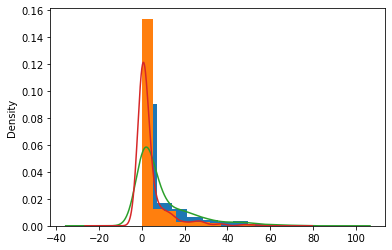

In [5]:
data_reduce.Roskilde.plot.hist(density=True)
data_reduce.Kalundborg.plot.hist(density=True)
data_reduce.Roskilde.plot.density()
data_reduce.Kalundborg.plot.density()

In [6]:
data_reduce.sum()

Roskilde      3459
Kalundborg    1421
dtype: int64

<AxesSubplot:>

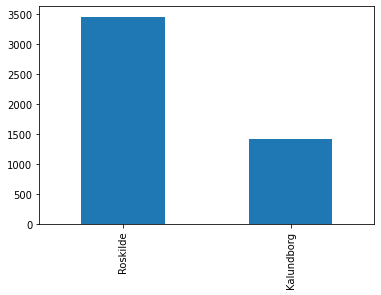

In [7]:
data_reduce.sum(axis=0)
data_reduce.sum(axis=0).plot.bar()

There are **51.262** citizens in Roskilde and **16.295** citizens in Kalundborg.  

Roskilde has an infection rate of **6.75%** of the citizens in the municipality  
Kalundborg has an infection rate of **8.72%** of the citizens in the municipality  

Kalundborg has a marginally larger infection percentage, which is odd considering Roskilde is a way larger municipality with a more dense population  

### Task 4

In [145]:
from scipy import stats
import numpy as np

# Our test data
a = data["Kalundborg"]
b = data["Roskilde"]

# Sample size / length of data
N = 368

In [152]:
var_a = a.var()
var_b = b.var()

print(a,b)

0      0
1      0
2      0
3      0
4      1
      ..
363    0
364    2
365    2
366    2
367    1
Name: Kalundborg, Length: 368, dtype: int64 0       1
1       0
2       0
3       0
4       0
       ..
363    10
364     8
365     8
366    10
367     3
Name: Roskilde, Length: 368, dtype: int64


In [164]:
# Standard Deviation
s = np.sqrt((var_a + var_b)/2)

print("Standard Deviation: " + str(s))

Standard Deviation: 10.756546194959958


In [165]:
# T-statistics
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))
print("T-statistic: " + str(t))

T-statistic: -6.983810165396658


In [166]:
# Compare with the critical t-value
# Degrees of freedom
df = 2*N - 2
print("Degree of freedom: " + str(df))

Degree of freedom: 734


In [167]:
# p-value after comparison with the t
p = stats.t.cdf(t,df=df)

print("t-value = " + str(t))
print("p-value = " + str(2*p))

t-value = -6.983810165396658
p-value = 6.4443777481552915e-12


In [169]:
# Comparing with scipy ttest function to cross reference that we calculated it corectly
t2, p2 = stats.ttest_ind(a,b)
print("t-value = " + str(t2))
print("p-Value = " + str(p2))

t-value = -6.983810165396658
p-Value = 6.4443777481552915e-12
